# All Imports Here

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline 

# All Common Methods Here

In [4]:
###############################################################
###    common methods here
###############################################################
def read_values( filename ):
    lines = [line.rstrip('\n') for line in open(filename)]
    vals = []
    for line in lines:
        vals.append(line)
    return np.array(vals).astype(np.float)

def plot_graph(x_axis_length ,errors, test_data, predictions):
    x_range = np.arange( x_axis_length )
#     print( "x_axis_length=", len(x_range) )
#     print( "errors_length=", len(errors) )
    if len(errors) != len(x_range):
        print("x_axis_length is not equal to errors_length.")
        return
    plt.plot(x_range, errors, 'darkblue', label='errors')
    plt.plot(x_range, test_data, 'darkgreen', label='actual')
    plt.plot(x_range, predictions, 'gold', label='predictions')
    plt.legend()
    plt.show()

# All actual implementation of methods here

In [5]:
# implementation of emwa method of prediction
# used in make_predictions
def ewma_long(data, alpha):
    conj_alpha = 1 - alpha
    prediction = alpha*data[-1]
    for i in range(len(data)-1, -1, -1):
        prediction += conj_alpha*data[i]
        conj_alpha *= conj_alpha
    return prediction

def ewma(last_observed, last_predicted, alpha):
    return alpha*last_observed + (1 - alpha)*last_predicted

class autoRegression:
    betas = []

    def __init__(self, data, interval, threshold):
        # create data from given interval
        x_s = []
        y_s = []
        for i in range(0, threshold-interval):
            x = [1] + data[i:i+interval]
            y = data[i+interval]
            x_s.append( np.array( x ) )
            y_s.append( y )
            
        X = np.array( x_s )#.reshape( (threshold, interval+1) )
        Y = np.array( y_s ).reshape( (len(y_s), 1) )
#         print( X.shape )
#         print( Y.shape )
        lm = LinearRegression()
        self.betas = lm.fit(X ,Y)
   
    def predict(self, features):
        features = [1] + features
        features = np.array( features ).reshape(1, len(features) )
        return self.betas.predict( features )[0][0]

# Single entry-point to all methods usage

In [6]:
# used for making predictions, by the specified method and paramter for that methods
def make_predictions(data, method="ewma", ewma_factor=0.5, season_factor=144, ar_factor=144, test_start_idx=576):
    errors = []
    predictions = []

    for i in range(test_start_idx, len(data)):

        #######################################################
        # handle all methods here
        if method == "ewma":
            last_observed = data[i-1]
            last_predicted = predictions[-1] if len(predictions) !=0 else data[i-1]
            prediction = ewma(last_observed, last_predicted, ewma_factor)

        elif method == "seasonal":
            prediction = data[i-season_factor]

        elif method == "ar":
            model = autoRegression(data, ar_factor, i)
            prediction = model.predict( data[i-ar_factor:i] )

        else:
            print("invalid method passed."); return
        #######################################################

        error = abs( (prediction - data[i]) / data[i] ) * 100
        errors.append( error )
        predictions.append( prediction )

    errors = np.array(errors).astype(np.float)
    average_error = np.mean( errors )

    print("average_error=", average_error)
    return [average_error, errors, predictions]

# Read the data from file and separate train and test data

In [7]:
# read the values from the file
data = read_values( "A5_q6.dat" )

test_start_idx = 576
train_data = data[:test_start_idx]
test_data  = data[test_start_idx:]



# Part A

('average_error=', 6.848918540923382)


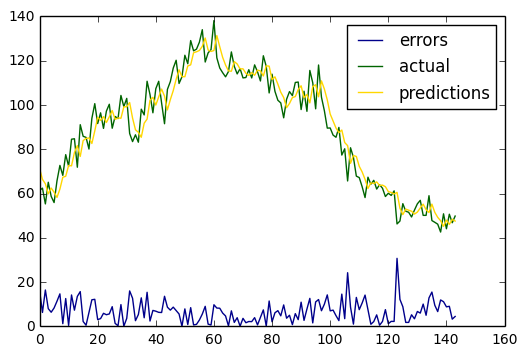

In [8]:
# part 1.a
[average_error, errors, predictions] = make_predictions(data, method="ewma", ewma_factor=0.5)
plot_graph(144, errors, test_data, predictions)

# Part B

('average_error=', 6.968071314741472)


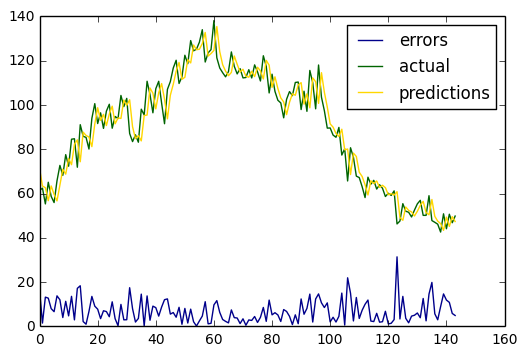

In [9]:
# part 1.b
[average_error, errors, predictions] = make_predictions(data, method="ewma", ewma_factor=0.8)
plot_graph(144, errors, test_data, predictions)

# Part C

('average_error=', 16.078203501786778)


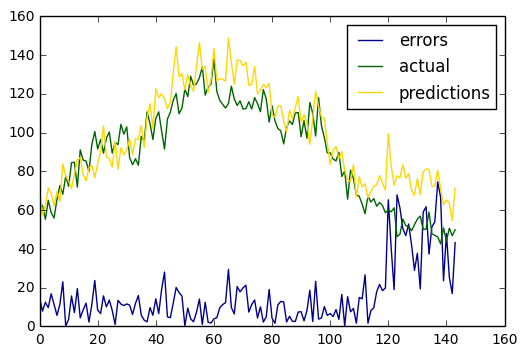

In [10]:
# part 1.c
[average_error, errors, predictions] = make_predictions(data, method="seasonal", season_factor=144)
plot_graph(144, errors, test_data, predictions)

# Part D

('average_error=', 7.532678336404022)


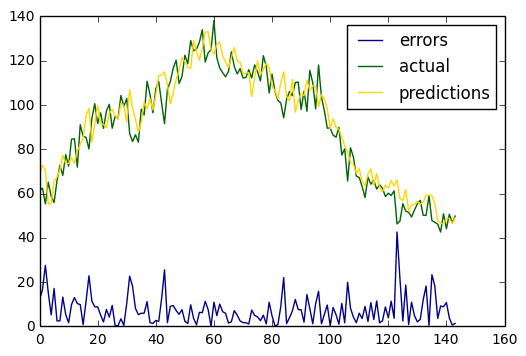

In [11]:
# part 1.d
[average_error, errors, predictions] = make_predictions(data, method="ar", ar_factor=144)
plot_graph(144, errors, test_data, predictions)

# Part E

('average_error=', 6.983475819787704)


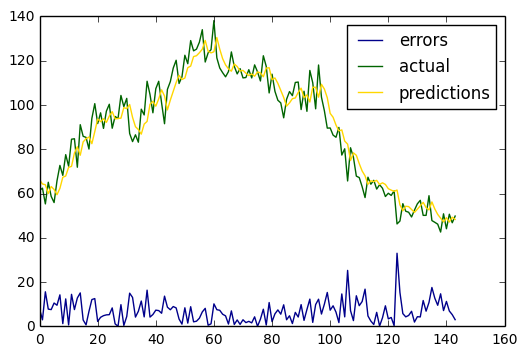

In [12]:
# part 1.e
[average_error, errors, predictions] = make_predictions(data, method="ar", ar_factor=6)
plot_graph(144, errors, test_data, predictions)